## Importation des modules et lectures du fichier 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
labels=None
indiv=[]
varbs=None

In [35]:
keys=np.loadtxt("KeyboardData1.csv",dtype='str',delimiter=',')
labels = keys[1:,0]
keys=keys[:,1:] # On retire la premiere colonne
varbs=keys[0,:] #nom des variables
X=keys[1:,:].astype(float)

### on regarde un peu les données

In [36]:
print(varbs) #H = hold, UD = UpDown 
len(varbs)

['H.period' 'UD.period.t' 'H.t' 'UD.t.i' 'H.i' 'UD.i.e' 'H.e' 'UD.e.five'
 'H.five' 'UD.five.Shift.r' 'H.Shift.r' 'UD.Shift.r.o' 'H.o' 'UD.o.a'
 'H.a' 'UD.a.n' 'H.n' 'UD.n.l' 'H.l' 'UD.l.Return' 'H.Return']


21

In [37]:
print(labels)

['2' '2' '2' ... '57' '57' '57']


In [38]:
np.shape(X)

(19176, 21)

In [39]:
#Remarque : probablement pas besoin de faire de normalisation, mais à tester 
print(X)

[[0.1491 0.2488 0.1069 ... 0.1338 0.2171 0.0742]
 [0.1111 0.234  0.0694 ... 0.0839 0.1917 0.0747]
 [0.1328 0.0744 0.0731 ... 0.1085 0.1762 0.0945]
 ...
 [0.0939 0.025  0.1008 ... 0.1034 0.0983 0.0905]
 [0.0923 0.0371 0.0913 ... 0.0979 0.0938 0.0931]
 [0.0596 0.0714 0.0992 ... 0.0807 0.1186 0.1018]]


### ACP

In [40]:
def stdise(X):
  """Routine de standardisation
  """
  Xs=X.astype(float)
  mk=np.mean(Xs,axis=0)
  # Calcul de l'ecart-type avec max pour eviter une division par 0
  sk=np.maximum(np.std(Xs,axis=0),10*np.finfo(float).eps)
  Xs=np.add(Xs,-mk)
  Xs=np.multiply(Xs,1/sk)
  return Xs
# SVD. Axes Composantes
# Apres standardisation les colonnes sont de norme "nb de ligne" et non 1,
# on corrige cela, pour avoir de meilleures echelles.
Ps=stdise(X)/np.sqrt(np.shape(X)[0])
(U,D,VT) = np.linalg.svd(Ps,full_matrices=False)

In [41]:
# Premieres composantes principales
C1 = D[0]*U[:,0]
C2 = D[1]*U[:,1]
C3 = D[2]*U[:,2]

In [42]:
np.shape(C1)

(19176,)

## Tracés

Text(0, 0.5, 'C2')

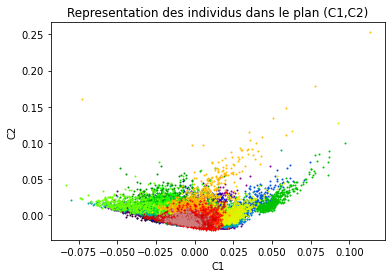

In [43]:
plt.close('all')
plt.figure()
plt.title('Representation des individus dans le plan (C1,C2)')
if labels is None:
  plt.scatter(C1,C2)
else:
  vlab=np.unique(labels)
  lv=len(vlab)
  cols=plt.cm.nipy_spectral(np.arange(lv)/lv)
  for i,vl in enumerate(vlab):
    l=labels==vl
    plt.scatter(C1[l],C2[l],s=1,label=vl,color=cols[i])
#for i,nm in enumerate(indiv): plt.text(C1[i],C2[i],nm)
plt.xlabel('C1')
plt.ylabel('C2')

In [44]:
vlab = np.unique(labels)
print(vlab)

['10' '11' '12' '13' '15' '16' '17' '18' '19' '2' '20' '21' '22' '24' '25'
 '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39'
 '4' '40' '41' '42' '43' '44' '46' '47' '48' '49' '5' '50' '51' '52' '53'
 '54' '55' '56' '57' '7' '8']


Text(0, 0.5, 'C2')

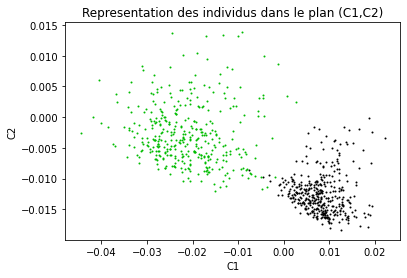

In [45]:
plt.close('all')
plt.figure()
plt.title('Representation des individus dans le plan (C1,C2)')
if labels is None:
  plt.scatter(C1,C2)
else:
  vlab=np.unique(labels)[:2]
  lv=len(vlab)
  cols=plt.cm.nipy_spectral(np.arange(lv)/lv)
  for i,vl in enumerate(vlab):
    l=labels==vl
    plt.scatter(C1[l],C2[l],s=1,label=vl,color=cols[i])
#for i,nm in enumerate(indiv): plt.text(C1[i],C2[i],nm)
plt.xlabel('C1')
plt.ylabel('C2')

In [46]:
a = np.array([1,2,3])
print(a==5)
print(a[[True,False,True]])

[False False False]
[1 3]


In [33]:
a[:1]

array([1])